# import

---

In [718]:
import nilmtk
from nilmtk.dataset_converters import convert_redd
from nilmtk import DataSet
from nilmtk.utils import print_dict
from bokeh.io import output_file, show
from bokeh.layouts import gridplot
from bokeh.palettes import Viridis3
from bokeh.plotting import figure
from bokeh.palettes import Dark2_5 as palette
import itertools  
from bokeh.palettes import Category10
from bokeh.palettes import brewer
from bokeh.io import output_file, show
from bokeh.plotting import figure

# 데이터 컨버터 (return : DataSet)

---

In [ ]:
# 데이터 컨버트 
# .dat ==> .h5
convert_redd('C:\\Users\\Kim-Taesu\\Documents\\nilm\\low_freq', 'C:\\Users\\Kim-Taesu\\Documents\\nilm\\data\\redd.h5')

# .h5 데이터(컨버트된) read
redd = DataSet('C:\\Users\\Kim-Taesu\\Documents\\nilm\\data\\redd.h5')

# date load 함수
def getData(inputPath, convertOutputPath):
    convert_redd(inputPath, convertOutputPath)
    return DataSet(convertOutputPath)

# 데이터 시각화

---

###  전체 빌딩 개수 (return : buildingCount(int))

In [626]:
# 빌딩 총 count 
def getBuildingsCnt(data):
    return len(data)
buildings_count = getBuildingsCnt(redd.buildings)
print(buildings_count)

6


### 각 빌딩 전력 정보 (return : dict{ building(int) : elecInfo })

In [625]:
def getBuildinsElec(buildingsNum):
    buildingsElec = {}
    for x in range(1, buildingsNum+1):
        buildingsElec[x]=redd.buildings[x].elec
    return buildingsElec
buildingsElec = getBuildinsElec(buildings_count)
print_dict(buildingsElec)

MeterGroup(meters=
  ElecMeter(instance=1, building=6, dataset='REDD', site_meter, appliances=[])
  ElecMeter(instance=2, building=6, dataset='REDD', site_meter, appliances=[])
  ElecMeter(instance=3, building=6, dataset='REDD', appliances=[Appliance(type='sockets', instance=1)])
  ElecMeter(instance=4, building=6, dataset='REDD', appliances=[Appliance(type='washer dryer', instance=1)])
  ElecMeter(instance=5, building=6, dataset='REDD', appliances=[Appliance(type='electric stove', instance=1)])
  ElecMeter(instance=6, building=6, dataset='REDD', appliances=[Appliance(type='CE appliance', instance=1)])
  ElecMeter(instance=7, building=6, dataset='REDD', appliances=[Appliance(type='unknown', instance=1)])
  ElecMeter(instance=8, building=6, dataset='REDD', appliances=[Appliance(type='fridge', instance=1)])
  ElecMeter(instance=9, building=6, dataset='REDD', appliances=[Appliance(type='dish washer', instance=1)])
  ElecMeter(instance=10, building=6, dataset='REDD', appliances=[Appliance(

### 각 빌딩 가전기기 종류 (return : dict{ building(int) : list })

In [526]:
def getBuildingAppliances(buildingsNum):
    buildingAppliances={}
    for i in range(1,buildingsNum+1):
        appliancesLen = len(buildingsElec[i].appliances)
        buildingAppliances[i]=[]
        for j in range(appliancesLen):
            buildingAppliances[i].append(buildingsElec[i].appliances[j].type['type'])
    return buildingAppliances
buildingAppliances=getBuildingAppliances(buildings_count)
# print_dict(buildingAppliances)

### 각 빌딩 전력데이터 (return : Dict{ building(int) : DataFrame })

In [535]:
def getBuildingsPower(buildingsNum):
    buildingsPower={}
    for x in range(1, buildingsNum+1):
        buildingsPower[x]=next(buildingsElec[x].load())['power'].dropna()
    return buildingsPower
buildingsPower = getBuildingsPower(buildings_count)
print_dict(buildingsPower)

Loading data for meter ElecMeterID(instance=4, building=1, dataset='REDD')      dataset='REDD'), ElecMeterID(instance=4, building=1, dataset='REDD')))     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=20, building=1, dataset='REDD')      dataset='REDD'), ElecMeterID(instance=20, building=1, dataset='REDD')))     
Done loading data all meters for this chunk.

Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=11, building=2, dataset='REDD')     
Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=14, building=3, dataset='REDD')      dataset='REDD'), ElecMeterID(instance=14, building=3, dataset='REDD')))     
Done loading data all meters for this chunk.

Done loading data all meters for this chunk.
Loading data for meter ElecMeterID(instance=10, building=4, dataset='REDD')     dataset='REDD'), ElecMeterID(instance=10, building=4, dataset='REDD')))     
Done loading data 

### 시간당 에너지 사용량 시각화 (return : figure)

###### 특정 building의 시간당 에너지 사용량 시각화

In [717]:
# tmp1 = buildingsPower[1].resample(rule='H').mean()
# tmp1.index.name = 'timestamp'
# tmp1.to_csv('tmp1.csv')

In [568]:
def buildingVisualization(buildingCount, flag):
    tmp = buildingsPower[buildingCount].resample(rule='H').mean()
    p = figure(x_axis_label='timestamp', y_axis_label ='power', x_axis_type='datetime', title='building'+str(buildingCount))
    p.line(tmp.index, tmp['apparent'], color="firebrick", legend="apparent")
#     p.line(tmp.index, tmp['active'], color="navy", legend="active")
    
    if flag:
        show(p)
    output_file('html/building'+str(buildingCount)+'Visualization.html')
    return p

# example
buildingVisualization(1,True)

Figure(id='335592', ...)

###### 각 building의 시간당 에너지 사용량 시각화 종합 (output file : html/buildingsVisualization.html)

In [569]:
def buildingsVisualization(x_size):
    tmp=[]
    tmp_x = []
    for i in range(1, buildings_count+1):
        tmp_x.append(buildingVisualization(i, False))
        if i % x_size==0:
            tmp.append(tmp_x)
            tmp_x=[]
    grid = gridplot(tmp)
    show(grid)
    output_file('html/buildingsVisualization.html')
    
# example
buildingsVisualization(3)

### 모든 building의 시간당 에너지 사용량 시각화 (return : figure)

In [618]:
def totalEnergyVisualization(buildingNum, flag):
    tmp = pd.DataFrame()
    
    for i in range(1,buildingNum+1):
        tmp = pd.concat((tmp , buildingsPower[i].resample(rule='H').mean()))
    tmp = tmp.groupby(tmp.index).mean()
    
    p = figure(x_axis_label='timestamp', y_axis_label ='power', x_axis_type='datetime', title='Total Energy Status per hour')
    p.line(tmp.index, tmp['apparent'], color="firebrick", legend="apparent")
#     p.line(tmp.index, tmp['active'], color="navy", legend="active")
    show(p)
    output_file('total_energy_status.html')
    

# # example
totalEnergyVisualization(buildings_count,True)

  ERROR: Could not find a version that satisfies the requirement bokeh.io (from versions: none)
ERROR: No matching distribution found for bokeh.io


### 각 지역 building의 시간당 에너지 사용량 시각화 (return : figure)

In [709]:
def districtTotalEnergyVisualization(buildingNum, flag):
    tmp = pd.DataFrame()
    for i in range(1,(buildingNum//2)+1):
        tmp = pd.concat((tmp , buildingsPower[i].resample(rule='H').mean()))
    tmp = tmp.groupby(tmp.index).mean()
    
    tmp2 = pd.DataFrame()
    for i in range((buildingNum//2)+1, buildingNum+1):
        tmp2 = pd.concat((tmp2 , buildingsPower[i].resample(rule='H').mean()))
    tmp2 = tmp2.groupby(tmp2.index).mean()
    
    p1 = figure(x_axis_label='timestamp', y_axis_label ='power', x_axis_type='datetime', title='District 1 Total Energy Status per hour')
    p1.line(tmp.index, tmp['apparent'], color="firebrick", legend="apparent")
    
    p2 = figure(x_axis_label='timestamp', y_axis_label ='power', x_axis_type='datetime', title='District 2 Total Energy Status per hour')
    p2.line(tmp2.index, tmp2['apparent'], color="firebrick", legend="apparent")
    
    result = row(p1,p2)
    show(result)
    
#     result.append(p1)
#     result.append(p2)
#     grid = gridplot(result)
#     show(grid)
#     output_file('html/districtTotalEnergyVisualization.html')
    

# # example
districtTotalEnergyVisualization(buildings_count,True)

### 시간당 가전기기 사용량 시각화

###### 특정 빌딩의 가전기기 사용량 확인 (output : html/building{Num}.html)

In [695]:
# buildingsPower
def getBuildingAppliances(buildingNum, flag):
    
    buildingP = figure(x_axis_label='timestamp', y_axis_label ='active', x_axis_type='datetime', title='building'+str(buildingNum))    
    buildingElec = buildingsElec[buildingNum]
    buildingAppliance = buildingAppliances[buildingNum]
    colors = Category20c[20]
    
    legendList={}
    
    for index in range(3,len(buildingAppliance)):
        if buildingAppliance[index-3] in legendList:
            legendList[buildingAppliance[index-3]]=legendList[buildingAppliance[index-3]]+1
        else:
            legendList[buildingAppliance[index-3]]=1
        
        buildingDf= next(buildingElec[index].load())['power'].dropna().resample(rule='H').mean()
        buildingP.line(buildingDf.index, buildingDf['active'], color=colors[index-3%20], legend=buildingAppliance[index-3]+str(legendList[buildingAppliance[index-3]]))
        
    buildingP.legend.location = "top_left"
    buildingP.legend.click_policy="hide"
    if flag:
        show(buildingP)    
        output_file('html/building'+str(buildingNum)+'.html')
    return buildingP

# example
buildingDf = getBuildingAppliances(3, True)



Meter 13 is in a nested meter group. Retrieving just the ElecMeter.
Meter 14 is in a nested meter group. Retrieving just the ElecMeter.


###### 각 building내 가전기기의 시간당 에너지 사용량 시각화 종합 (output file : html/buildingsVisualization.html)

In [710]:
def buildingsAppliances(x_size):
    tmp=[]
    tmp_x = []
    for i in range(1, buildings_count+1):
        tmp_x.append(getBuildingAppliances(i, False))
        if i % x_size==0:
            tmp.append(tmp_x)
            tmp_x=[]
    print(tmp)
    grid = gridplot(tmp)
    show(grid)
    output_file('html/buildingsAppliances.html')
    
# example
buildingsAppliances(3)

Meter 3 is in a nested meter group. Retrieving just the ElecMeter.
Meter 4 is in a nested meter group. Retrieving just the ElecMeter.
Meter 10 is in a nested meter group. Retrieving just the ElecMeter.
Meter 13 is in a nested meter group. Retrieving just the ElecMeter.
Meter 14 is in a nested meter group. Retrieving just the ElecMeter.
Meter 9 is in a nested meter group. Retrieving just the ElecMeter.
Meter 10 is in a nested meter group. Retrieving just the ElecMeter.
Meter 8 is in a nested meter group. Retrieving just the ElecMeter.
Meter 9 is in a nested meter group. Retrieving just the ElecMeter.
Meter 12 is in a nested meter group. Retrieving just the ElecMeter.
Meter 13 is in a nested meter group. Retrieving just the ElecMeter.
[[Figure(id='564303', ...), Figure(id='564806', ...), Figure(id='565015', ...)], [Figure(id='565674', ...), Figure(id='566227', ...), Figure(id='567060', ...)]]


### 모든 빌딩의 가전기기 사용량 확인 (output : html/building{Num}.html)

In [ ]:
# buildingsPower
def buildingsVisualization(x_size):
    tmp=[]
    tmp_x = []
    for i in range(1, buildings_count+1):
        tmp_x.append(buildingVisualization(i, False))
        if i % x_size==0:
            tmp.append(tmp_x)
            tmp_x=[]
    grid = gridplot(tmp)
    show(grid)
    output_file('html/buildingsVisualization.html')
    
# example
buildingsVisualization(3)

In [549]:


def applianceStatus(applianceName):
    x_axis_size=10000
    applianceP = figure(x_axis_label='timestamp', y_axis_label ='active', x_axis_type='datetime', title=applianceName)    
        
    colors = list(brewer["Set1"][buildings_count])
    for num, color in zip(range(1,buildings_count+1),colors):
        buildingElec = buildingsElec[num]
        print(num)
        try:
            applianceDf= next(buildingElec[applianceName].load())['power'].head(x_axis_size)
            applianceP.line(applianceDf.index[:], applianceDf['active'], color=color, legend="building"+str(num))
        except Exception:
            print('not exist')
        
    show(applianceP)
    
    output_file('html/applianceStatus_light.html')

# applianceStatus('light')
getbuildingAppliances(1)

  


# 가전기기 정보

### 가전기기의 시간대별 전력량 얻기 (return 데이터프레임)

In [ ]:
def getApplianceMeter(building, applianceName):
    return next(building[applianceName].load())
# getApplianceMeter(buildingsElec[1],'microwave')

### 가전기기의 총 전력량 얻기 (return float)

In [ ]:
def getApplianceTotal(building, applianceName):
    return building[applianceName].total_energy()
# getApplianceTotal(buildingsElec[1],'microwave')

### 데이터 프레임 csv 파일로 저장

In [ ]:
def saveToCsv(dataframe, outputPath):
    dataframe.to_csv(outputPath, mode='w')

### 기본 nilmtk 그래프

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,5))
redd.set_window(start='2011-04-21', end='2011-04-22')
buildingsElec[1].plot()
plt.xlabel("Time")

### 각 빌딩의 가전제품 에너지 소모 비율

In [714]:
from __future__ import print_function, division
import time

from matplotlib import rcParams
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from six import iteritems

from nilmtk import DataSet, TimeFrame, MeterGroup, HDFDataStore
from nilmtk.legacy.disaggregate import CombinatorialOptimisation, FHMM
import nilmtk.utils

from math import pi

import pandas as pd

from bokeh.io import output_file, show
from bokeh.palettes import Category20c
from bokeh.plotting import figure
from bokeh.transform import cumsum


def buildingApplianceFraction(buildingNum):
    elec = buildingsElec[buildingNum]
    fraction = elec.submeters().fraction_per_meter().dropna()
    labels = elec.get_labels(fraction.index)
    
    labelsDup={}
    for l in labels:
        labelsDup[l]=1

    for x in range(len(labels)):
        tmp = labels.pop(0)
        if tmp in labels:
            labels.append(tmp+str(labelsDup[tmp]))
            labelsDup[tmp]=labelsDup[tmp]+1
        else:
            labels.append(tmp)

    x={}
    for i in range(len(labels)):
        x[labels[i]]=fraction[i]

    data = pd.Series(x).reset_index(name='value').rename(columns={'index':'country'})

    data['angle'] = data['value']/data['value'].sum() * 2*pi
    if len(x)>20:
        data['color'] = pd.Series(Category20c[20],index=[x for x in range(20)])
        tmp = pd.Series(Category20c[len(x)-20+3],index=[x for x in range(20,20+len(x)-20+3)])
        data['color'].append(tmp)
    else:
        data['color'] = Category20c[len(x)]
    data.head()

    p = figure(title="building"+str(buildingNum)+" fraction per meter", toolbar_location=None,
               tools="hover", tooltips="@country: @value", x_range=(-0.5, 1.0))

    p.wedge(x=0, y=1, radius=0.4,
            start_angle=cumsum('angle', include_zero=True), end_angle=cumsum('angle'),
            line_color="white", fill_color='color', legend='country', source=data)

    p.axis.axis_label=None
    p.axis.visible=False
    p.grid.grid_line_color = None
    
    
#     output_file("building"+str(buildingNum)+"_fraction.html")
    return p
#     show(p)

list1=[]
list2=[]
for i in range(1,4):
    list1.append(buildingApplianceFraction(i))
for i in range(4,7):
    list2.append(buildingApplianceFraction(i))
grid = gridplot([list1, list2])
output_file('html/buildings_fraction.html')
show(grid)


15/16 MeterGroup(meters==19, building=1, dataset='REDD', appliances=[Appliance(type='unknown', instance=2)])e=1)])ce=1)])
  ElecMeter(instance=3, building=1, dataset='REDD', appliances=[Appliance(type='electric oven', instance=1)])
  ElecMeter(instance=4, building=1, dataset='REDD', appliances=[Appliance(type='electric oven', instance=1)])
16/16 MeterGroup(meters= for ElecMeterID(instance=3, building=1, dataset='REDD') ...    total_energy for ElecMeterID(instance=4, building=1, dataset='REDD') ...   
  ElecMeter(instance=10, building=1, dataset='REDD', appliances=[Appliance(type='washer dryer', instance=1)])
  ElecMeter(instance=20, building=1, dataset='REDD', appliances=[Appliance(type='washer dryer', instance=1)])
19/19 MeterGroup(meters==22, building=3, dataset='REDD', appliances=[Appliance(type='sockets', instance=5)])1)])1)])])instance=20, building=1, dataset='REDD') ...   
  ElecMeter(instance=13, building=3, dataset='REDD', appliances=[Appliance(type='washer dryer', instance=1)]

# 에너지 예측 시각화

### 데이터 read

In [ ]:
result_origin_df = pd.read_csv('data/result_cutted.csv',index_col='timestamp', parse_dates=True)
result_predict_df = pd.read_csv('data/result_predict.csv',index_col='timestamp', parse_dates=True)

del result_origin_df['Unnamed: 3']
del result_predict_df['Unnamed: 3']

### dataframe으로 변경

In [ ]:
origindf = pd.read_csv('result_cutted.csv', index_col='timestamp', parse_dates=True)
predictdf = pd.read_csv('result_predict.csv', index_col='timestamp', parse_dates=True)

In [723]:
apparent_p = figure(x_axis_label='timestamp', y_axis_label ='power', x_axis_type='datetime', title='compare apparent')
origindf_p = figure(x_axis_label='timestamp', y_axis_label ='power', x_axis_type='datetime', title='compare active')

apparent_p.line(origindf.index, origindf['apparent'], color="firebrick", legend="origin")
apparent_p.line(predictdf.index, predictdf['apparent'], color="navy", legend="predict")
origindf_p.line(origindf.index, origindf['active'], color="firebrick", legend="origin")
origindf_p.line(predictdf.index, predictdf['active'], color="navy", legend="predict")
show(origindf_p)

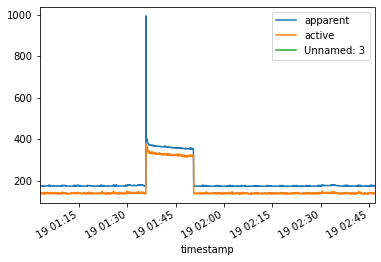

In [523]:
origindf.plot()

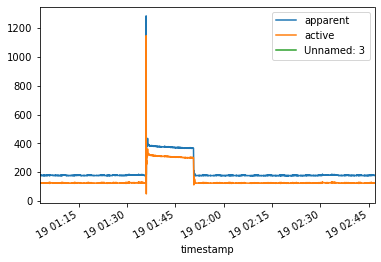

In [524]:
predictdf.plot()